In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)


In [3]:
df['target'] = iris.target


In [4]:


df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])




In [5]:


df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]



In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

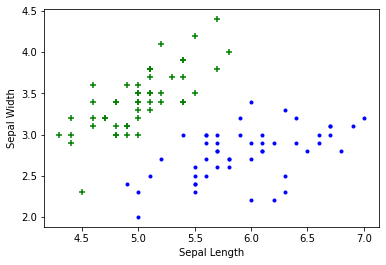

In [7]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

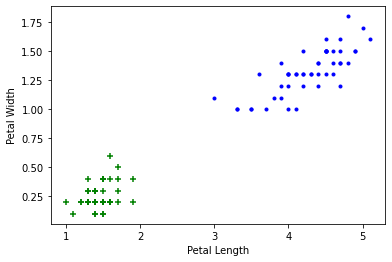

In [8]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['target','flower_name'], axis='columns')
y = df.target



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier


In [12]:
error = []
for i in range(1, len(X_test)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    mae = knn.score(X_test, y_test)
    error.append(mae)
    
print(error)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


In [13]:
k=5

In [14]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
p = knn.score(X_test, y_test)
print(p)

1.0


In [15]:
knn.predict([[4.8,3.0,1.5,0.3]])

c:\Users\ibrah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Text(42.0, 0.5, 'Truth')

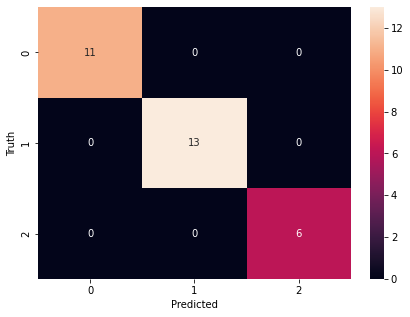

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

